In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Python\PP6\insurance.csv")
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data includes 6 features, with "charges" as the target variable.
To explore tmhe data, we will create a dashboard that represents our features and allows us to compare them.

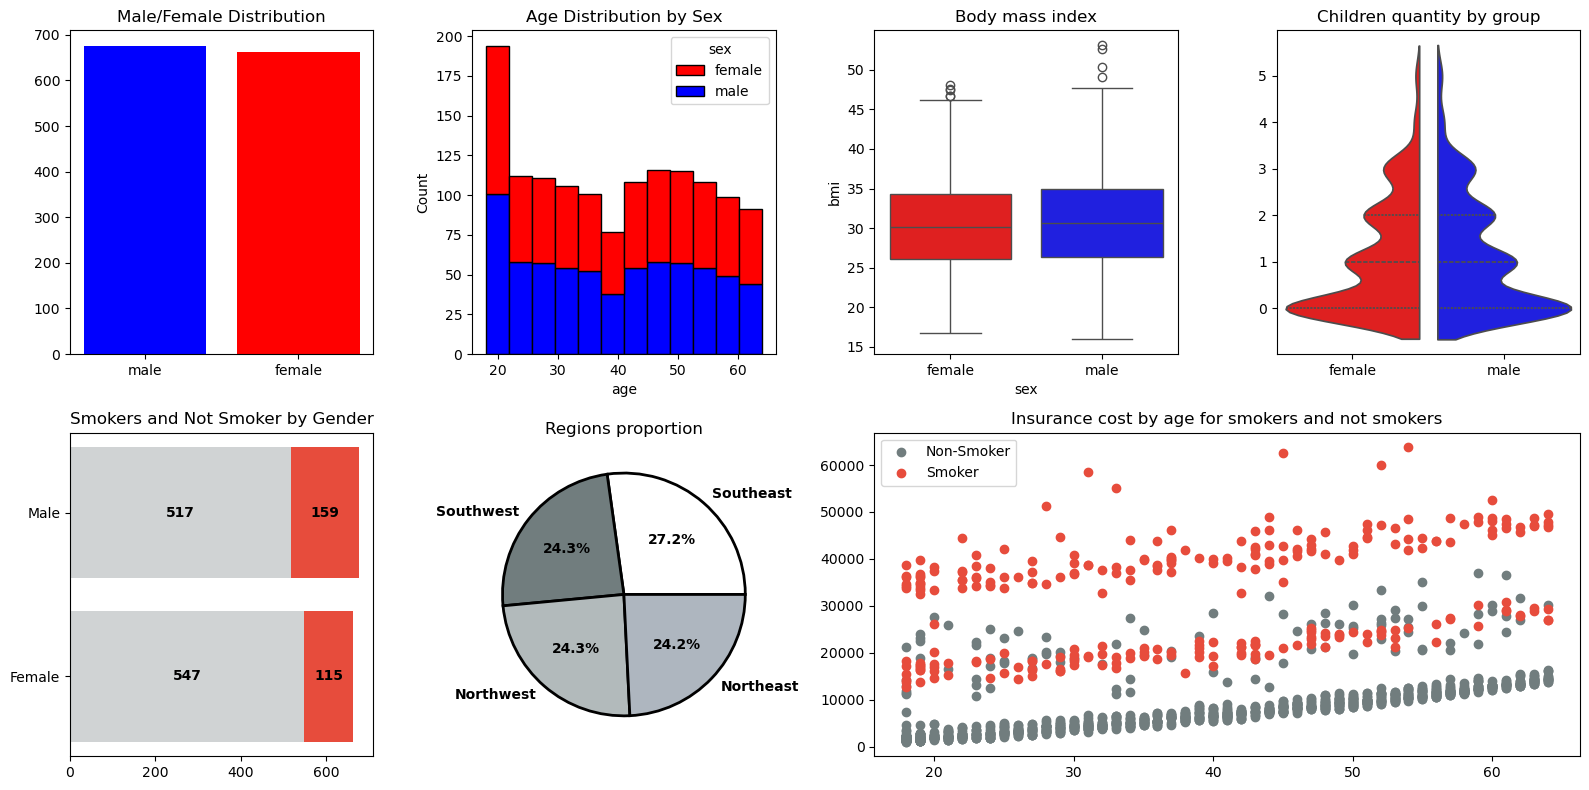

In [6]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(2, 4)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])
ax5 = fig.add_subplot(gs[1, 0])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[1, 2:])

ax1.bar(df['sex'].value_counts().index, df['sex'].value_counts(), color=['blue', 'red'])
ax1.set_title('Male/Female Distribution')

sns.histplot(data=df, x="age", hue="sex", multiple="stack", palette=['red', 'blue'], ax=ax2, alpha=1)
ax2.set_title('Age Distribution by Sex')

sns.boxplot(x='sex', y='bmi', data=df, hue='sex', palette=['red', 'blue'], ax=ax3)
ax3.set_title('Body mass index')


sns.violinplot(x='sex', y='children', hue='sex', palette=['red', 'blue'], ax=ax4, data=df, split=True, inner="quart",  gap=-.1)
ax4.set_title('Children quantity by group')
ax4.set(xlabel=None)
ax4.set(ylabel=None)

df_counts = df[['sex', 'smoker']].value_counts().reset_index(name='counts').sort_values(by='sex')
female_counts = df_counts[df_counts['sex'] == 'female']['counts'].values
ax5.barh('Female', female_counts[0], color='#d0d3d4', label='Non-Smoker')
ax5.text(female_counts[0] / 2, 'Female', str(female_counts[0]), va='center', ha='center', color='black',
             weight='bold')
ax5.barh('Female', female_counts[1], color='#e74c3c', left=female_counts[0], label='Smoker')
ax5.text(female_counts[0] + female_counts[1] / 2, 'Female', str(female_counts[1]), va='center', 
              ha='center', color='black', weight='bold')
male_counts = df_counts[df_counts['sex'] == 'male']['counts'].values
ax5.barh('Male', male_counts[0], color='#d0d3d4')
ax5.text(male_counts[0] / 2, 'Male', str(male_counts[0]), va='center', ha='center', color='black', 
              weight='bold')
ax5.barh('Male', male_counts[1], color='#e74c3c', left=male_counts[0])
ax5.text(male_counts[0] + male_counts[1] / 2, 'Male', str(male_counts[1]), va='center', 
              ha='center', color='black', weight='bold')
ax5.set_title('Smokers and Not Smoker by Gender')

ax6.pie(df['region'].value_counts(), labels=df['region'].value_counts().index.str.capitalize(), 
        autopct='%1.1f%%', colors=['#ffffff', '#717d7e', '#b2babb', '#aeb6bf'], 
        textprops={'weight': 'bold'},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'antialiased': True})
ax6.set_title('Regions proportion')

ax7.scatter(df[df['smoker'] == 'no']['age'], df[df['smoker'] == 'no']['charges'], c='#717d7e', label='Non-Smoker')
ax7.scatter(df[df['smoker'] == 'yes']['age'], df[df['smoker'] == 'yes']['charges'], c='#e74c3c', label='Smoker')
ax7.set_title('Insurance cost by age for smokers and not smokers')
plt.legend(loc=2)

plt.tight_layout()
plt.show()

The data is well-balanced, with an equal number of men and women across different features.
We notice that costs have three clusters, and smokers tend to pay more than non-smokers.

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

onehot = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot.fit_transform(df[['region', 'sex']])
onehot_df = pd.DataFrame(onehot_encoded, columns=onehot.get_feature_names_out(['region', 'sex']))
df = pd.concat([df, onehot_df], axis=1).drop(columns=['region', 'sex'])

label_encoder = LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])

Next step is check corelation after encoding

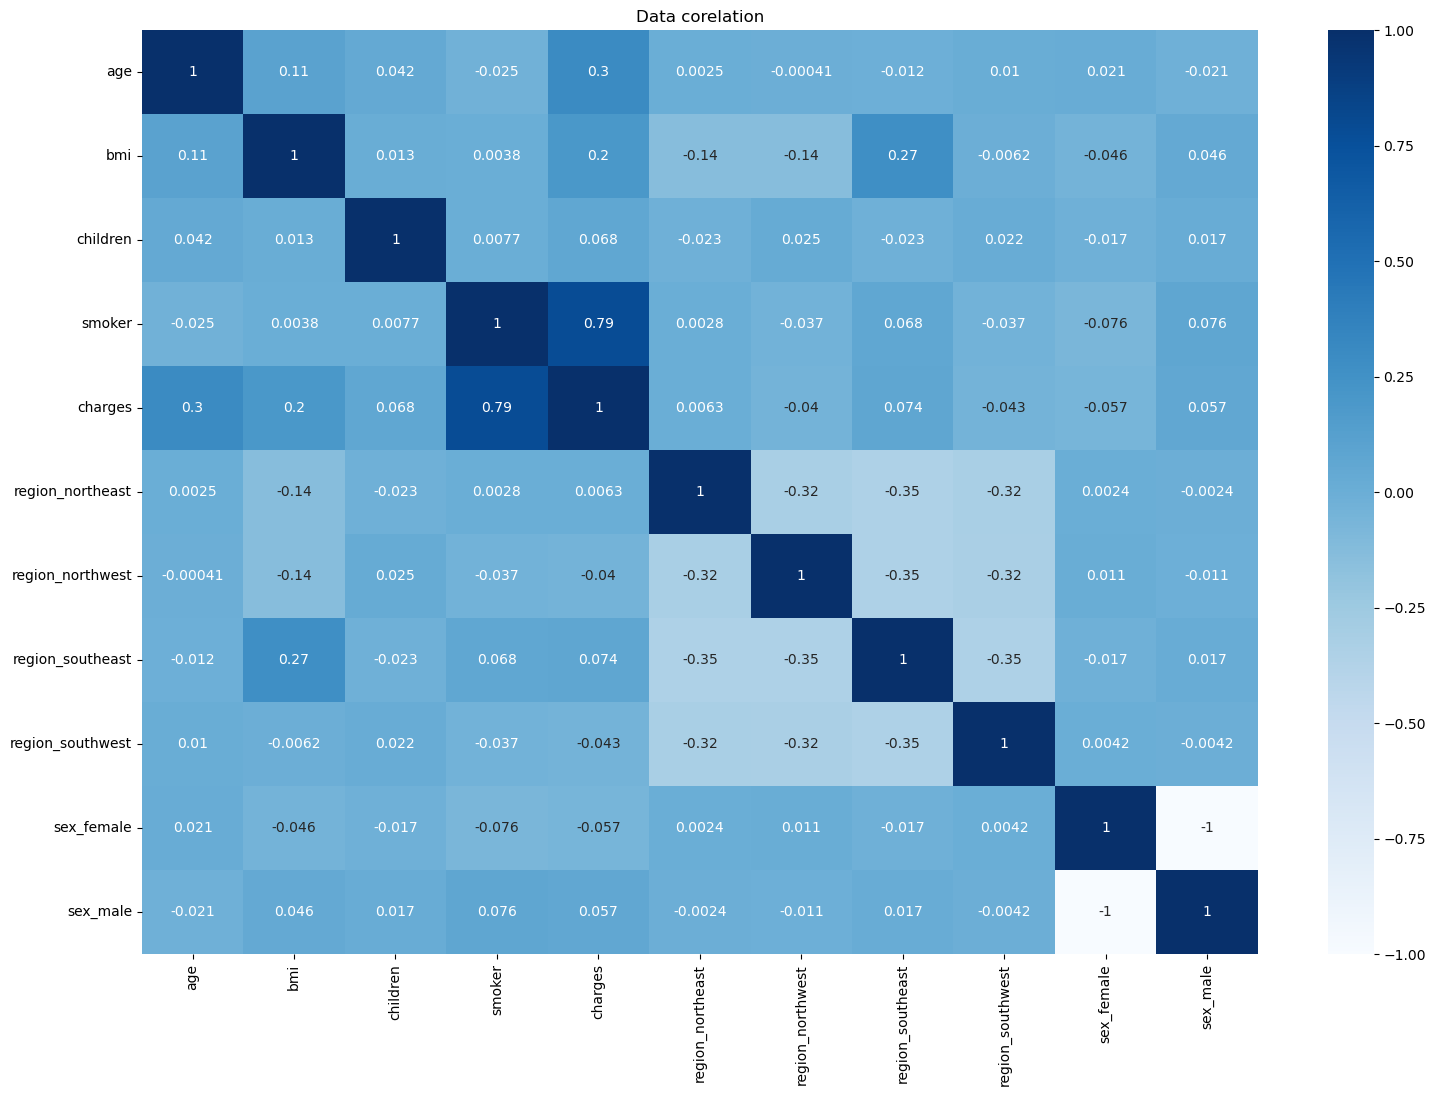

In [10]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Data corelation')
plt.show()

We can see that "smoker," "bmi," and "age" are highly correlated with our target variable.

The next step is to enter the world of machine learning.
First, we will check basic ML models, starting with RandomForestRegressor and Ridge regression.
For evaluatin model we will use R^2 score.

In [13]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import pandas as pd


X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [5, 10],
            'model__min_samples_leaf': [1, 2, 4, 6],
            'model__min_samples_split': [2, 4, 6, 8]
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0]
        }
    }
}
best_models = {}
models_scores_cros = {}
models_scores_R2 = {}

for model_name, config in models.items():
    pipe = Pipeline([('model', config['model'])])
    grid = GridSearchCV(pipe, config['params'], cv=kfold, scoring='r2')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best cross-validated score for {model_name}: {grid.best_score_:.4f}")
    models_scores_cros[model_name] = grid.best_score_
    
for model_name, model in best_models.items():
    test_score = r2_score(y_test, model.predict(X_test))
    print(f"Test R^2 score for {model_name}: {test_score:.4f}")
    models_scores_R2[model_name] = test_score

best_Ridge = best_models['Ridge']
best_RFR = best_models['RandomForest']

Best parameters for RandomForest: {'model__max_depth': 5, 'model__min_samples_leaf': 6, 'model__min_samples_split': 8, 'model__n_estimators': 100}
Best cross-validated score for RandomForest: 0.8576
Best parameters for Ridge: {'model__alpha': 0.1}
Best cross-validated score for Ridge: 0.7389
Test R^2 score for RandomForest: 0.8794
Test R^2 score for Ridge: 0.7836


RandomForestRegressor showed good performs.
We will dig deeper and compare it with GBRegressor and GradientBoostingRegressor.

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
GB_model = GradientBoostingRegressor()
GB_params = {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5]
}
GB_grid = GridSearchCV(GB_model, GB_params, cv=kfold, scoring='r2')
GB_grid.fit(X_train, y_train)

best_GB = GB_grid.best_estimator_
print(f"Best parameters for Gradient Boosting: {GB_grid.best_params_}")
print(f"Best cross-validated score for Gradient Boosting: {GB_grid.best_score_:.4f}")
models_scores_cros['Gradient Boosting'] = GB_grid.best_score_

test_score = r2_score(y_test, best_GB.predict(X_test))
print(f"Test R^2 score for Gradient Boosting: {test_score:.4f}")
models_scores_R2['Gradient Boosting'] = test_score

Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validated score for Gradient Boosting: 0.8565
Test R^2 score for Gradient Boosting: 0.8802


R^2 tell enough and we able to go further.
After evaluating four models, we will keep two for the final MAE and RMSE comparison.

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_GB = best_GB.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_GB)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_GB))
print(f"GBoost: \nMAE: {mae:.4f}, \nRMSE: {rmse:.4f}")

y_pred_RandomForest = best_models['RandomForest'].predict(X_test)
mae = mean_absolute_error(y_test, y_pred_RandomForest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_RandomForest))
print(f"RandomForest: \nMAE: {mae:.4f}, \nRMSE: {rmse:.4f}")

GBoost: 
MAE: 2455.8111, 
RMSE: 4312.5074
RandomForest: 
MAE: 2457.1330, 
RMSE: 4326.4378


The winner is GBoost, which we can use to predict insurance costs based on our chosen parameters.
Let's try to predict self-insurance costs.

In [19]:
df_scores = pd.DataFrame({
    'Model': models_scores_R2.keys(),
    'R2 Score': models_scores_R2.values(),
    'Cross Val Score': models_scores_cros.values()
})

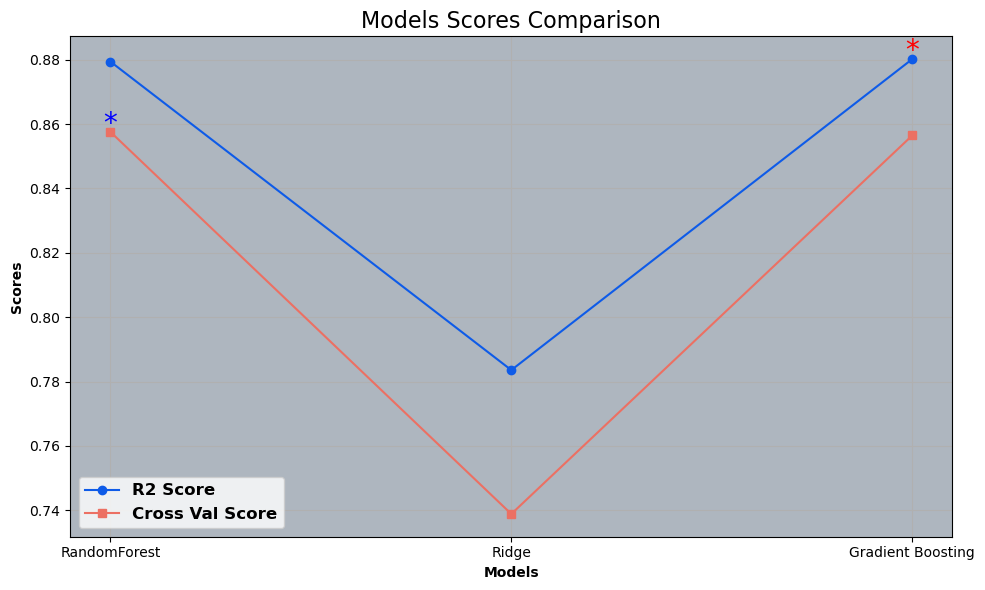

In [20]:
from matplotlib.font_manager import FontProperties

plt.figure(figsize=(10, 6))
plt.gca().set_facecolor('#aeb6bf')
plt.plot(df_scores['Model'], df_scores['R2 Score'], label="R2 Score", marker='o', color='#0e5be8')
plt.plot(df_scores['Model'], df_scores['Cross Val Score'], label="Cross Val Score", marker='s', color='#ec7063')

max_r2_idx = df_scores['R2 Score'].idxmax()
max_cross_val_idx = df_scores['Cross Val Score'].idxmax()
plt.text(max_r2_idx, df_scores['R2 Score'][max_r2_idx], '*', color='red', fontsize=20, ha='center')
plt.text(max_cross_val_idx, df_scores['Cross Val Score'][max_cross_val_idx], '*', color='blue', fontsize=20, ha='center')

font_properties = FontProperties(weight='bold', size=12)
plt.title("Models Scores Comparison", fontsize=16)
plt.xlabel("Models", fontdict={'weight': 'bold'})
plt.ylabel("Scores", fontdict={'weight': 'bold'})
plt.legend(prop=font_properties, fontsize=12) 

plt.tight_layout()
plt.grid(True)
plt.show()

We able to compare model features importance and correlation

In [22]:
feature_importance = sorted(zip(best_GB.feature_names_in_, best_GB.feature_importances_), key=lambda x: x[1], reverse=True)
feature_importance = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
other_qnty = len(feature_importance['Importance'] <= feature_importance.iloc[4]['Importance'])
feature_importance.loc[feature_importance['Importance'] <= feature_importance.iloc[4]['Importance'], 'Feature'] = f'Other {other_qnty} features'
grouped_feature_importance = feature_importance.groupby('Feature', as_index=False)['Importance'].sum()

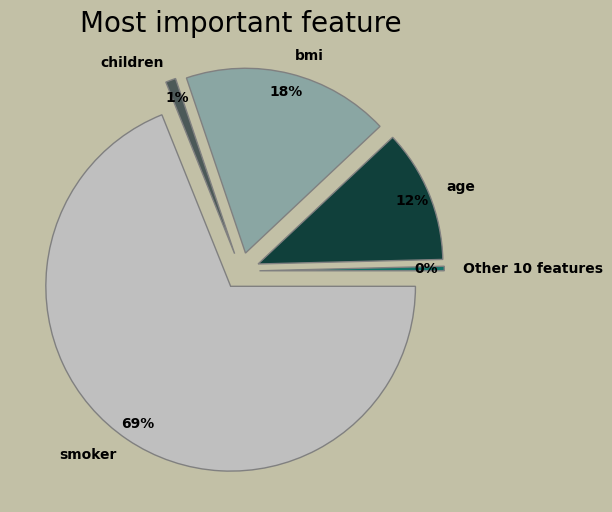

In [23]:
plt.figure(figsize=(16, 6), facecolor='#C2C0A6')
colors = ['#127369', '#10403B', '#8AA6A3', '#4C5958', '#BFBFBF']
plt.pie(grouped_feature_importance['Importance'], colors=colors, labels=grouped_feature_importance['Feature'], 
       autopct='%1.f%%', explode=list(0.1 for x in range(len(grouped_feature_importance))), 
        wedgeprops=({'edgecolor': 'gray'}), pctdistance=0.9, textprops={'weight': 'bold'})
plt.title('Most important feature', fontsize=20)
plt.show()

A feature importance chart and the corelation heatmap confirm the observed correlations.

Using Stacking Regressor we will try to improve performance and her robust result.

In [26]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base regressors
base_estimators = [
    ('random_forest', best_RFR),
    ('gradient_boosting', best_GB)    
]

# Define meta-model (ridge regression is a common choice)
meta_model = best_Ridge

# Create stacking regressor
stacking_regressor = StackingRegressor(estimators=base_estimators, final_estimator=meta_model)

stacking_regressor.fit(X_train, y_train)

y_pred = stacking_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Stacking Regressor R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Stacking Regressor R² Score: 0.8807
MAE: 2425.3397, RMSE: 4302.9283


The last stage is save model using joblib library

In [28]:
from joblib import dump, load

# Save model
dump(stacking_regressor, "insurance_model.joblib")  # ✅ Faster and smaller fil

['insurance_model.joblib']